# Marketing and business strategy

**Objective**  
Analyze the market and optimize them strategies to attract more clients.

**Objective Sprint 1**  
A first look at the average price by room type and city

**Description and characteristics of dataset**  
Pre-processed and cleaned dataframe with tourist accommodations listings.

In [81]:
# import libraries 
import os
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [82]:
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12

# display settings
#pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
 
# set palette
sns.set_palette('viridis')
blue_palette = ['#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']

sns.set_style("darkgrid")

## Data Loading

In [83]:
PATH = 'data'
SPRINT = 1
#filename = f'data_clean_sprint_{SPRINT}.csv'
filename = f'data_clean_latest.csv'

In [84]:
# define function to read file
def read_file(filename):
    
    """Input: number of sprint.
    Function reads .csv data of desired sprint. 
    Output: Dataframe or error.
    """
    
    # reading file
    try:
        df = pd.read_csv(os.path.join('..', PATH, filename), 
                         parse_dates=['insert_date', 'first_review_date', 'last_review_date'])
        display(df.head())
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return error      

In [85]:
df_new = read_file(filename)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community,has_reviews
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.00,3,365,1,7,20,40,130,78,2010-01-02,2017-09-05,970.00,100.00,100.00,100.00,100.00,100.00,100.00,0,75.00,spain,malaga,2018-07-31,Málaga,Centro,Andalucía,True
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.00,4,40,1,0,0,0,162,33,2014-10-10,2018-07-15,920.00,90.00,90.00,100.00,100.00,80.00,90.00,0,52.00,spain,madrid,2020-01-10,Madrid,Los Cármenes,Comunidad de Madrid,True
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.00,2.00,2.00,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.00,2,120,1,26,31,31,270,148,2011-01-05,2019-07-22,980.00,100.00,100.00,100.00,100.00,100.00,100.00,1,142.00,spain,sevilla,2019-07-29,Sevilla,San Vicente,Andalucía,True
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.00,2,730,1,9,23,49,300,292,2012-03-13,2020-01-04,940.00,100.00,90.00,100.00,100.00,100.00,90.00,1,306.00,spain,barcelona,2020-01-10,Barcelona,L'Antiga Esquerra de l'Eixample,Cataluña,True
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.00,2.00,5.00,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.00,1,180,1,0,19,49,312,36,2011-07-08,2018-08-08,970.00,100.00,100.00,100.00,100.00,100.00,100.00,0,39.00,spain,girona,2019-02-19,Girona,Quart,Cataluña,True


## Business Question
### ¿What is the price per accommodation type?

### By Room type and City

<Figure size 1200x600 with 0 Axes>

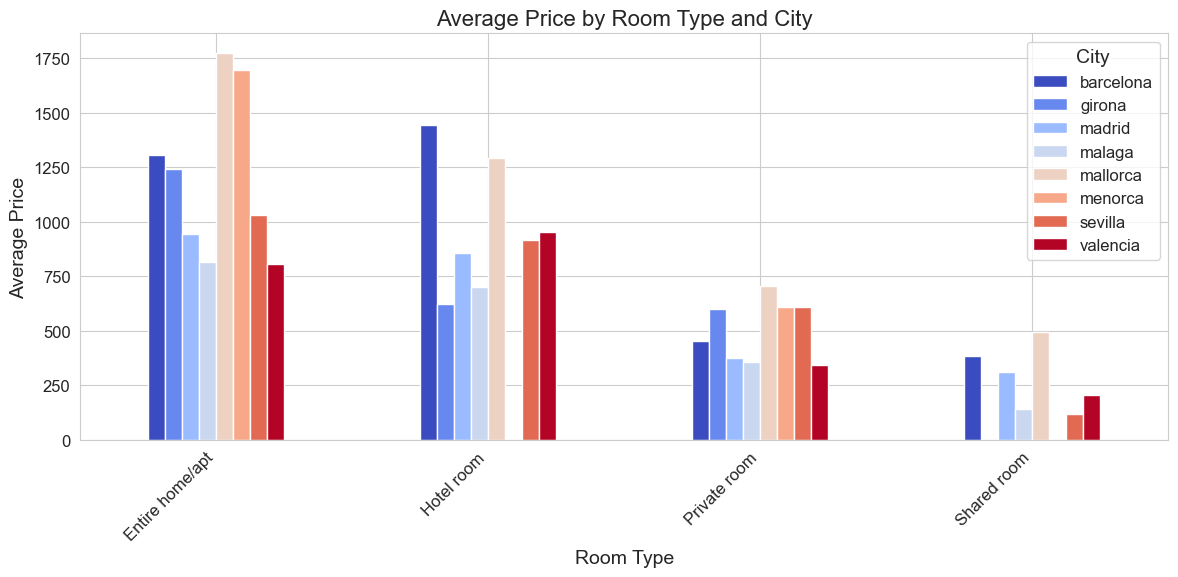

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("coolwarm") 
sns.set_style("whitegrid")

df_no_null_price = df_new.dropna(subset=['price'])

avg_price_by_room_type_city = df_no_null_price.groupby(['room_type', 'city'])['price'].mean().reset_index()
avg_price_by_room_type_city = avg_price_by_room_type_city.sort_values(by='price', ascending=True)

avg_price_pivot = avg_price_by_room_type_city.pivot(index='room_type', columns='city', values='price')

plt.figure(figsize=(12, 6))
avg_price_pivot.plot(kind='bar', colormap="coolwarm", figsize=(12, 6))  # Aplicamos la paleta "coolwarm"

plt.title('Average Price by Room Type and City')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City')
plt.tight_layout()
plt.show()


### By City

Average price by City:
city
mallorca    1691.42
menorca     1618.52
girona      1211.89
sevilla      939.68
barcelona    855.19
madrid       743.33
malaga       734.83
valencia     697.76
Name: price, dtype: float64


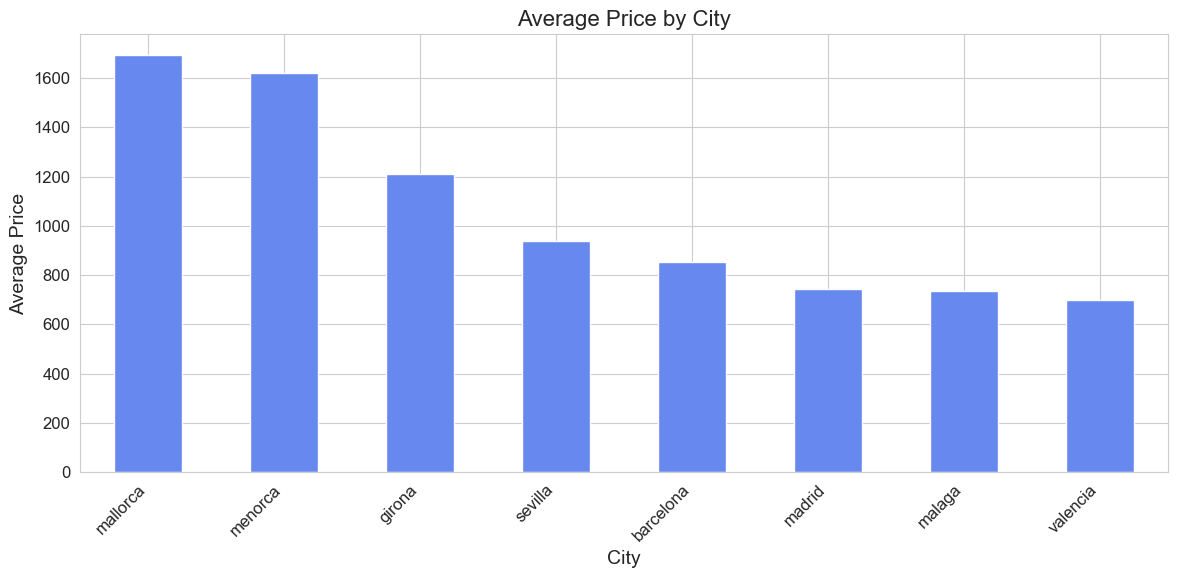

In [87]:
df_no_null_price = df_new.dropna(subset=['price'])

avg_price_by_city = df_no_null_price.groupby(['city'])['price'].mean()

avg_price_by_city = avg_price_by_city.sort_values(ascending=False)

print("Average price by City:")
print(avg_price_by_city)

plt.figure(figsize=(12, 6))
# Instead of unstacking, plot directly using 'plot.bar'
avg_price_by_city.plot(kind='bar', figsize=(12, 6)) # Changed to plot.bar()

plt.title('Average Price by City')
plt.xlabel('City') 
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### By Room Type

Average Price by Room Type:
room_type
Entire home/apt   1267.23
Hotel room        1039.83
Private room       450.09
Shared room        331.63
Name: price, dtype: float64


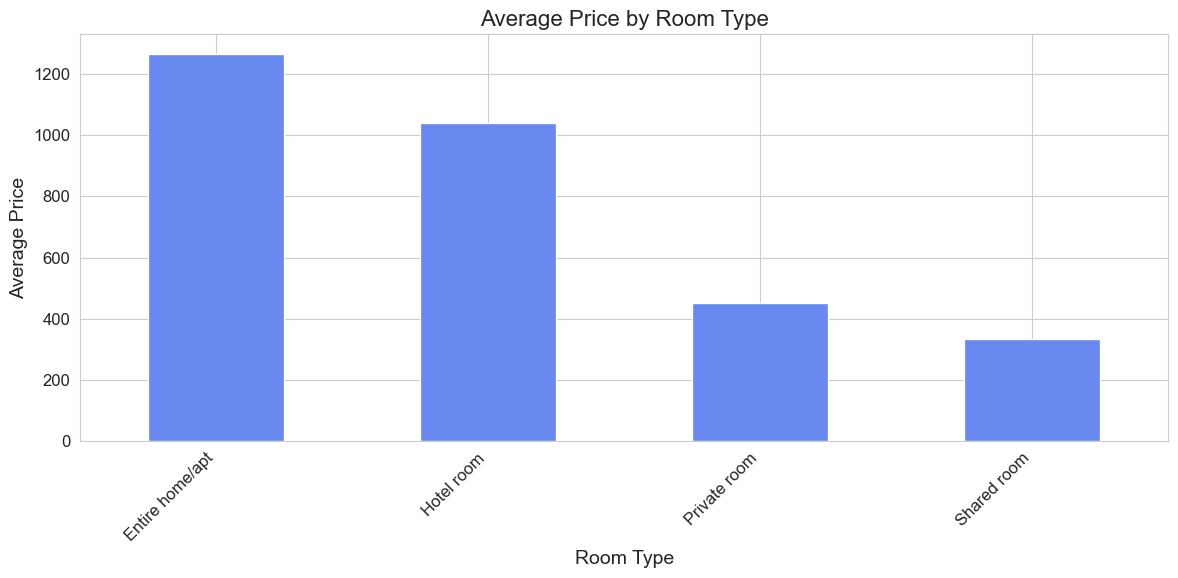

In [88]:
df_no_null_price = df_new.dropna(subset=['price'])

avg_price_by_city = df_no_null_price.groupby(['room_type'])['price'].mean()

avg_price_by_city = avg_price_by_city.sort_values(ascending=False)

print("Average Price by Room Type:")
print(avg_price_by_city)

plt.figure(figsize=(12, 6))

avg_price_by_city.plot(kind='bar', figsize=(12, 6)) 

plt.title('Average Price by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

## Conclusion and Recommendations

**General Observations:**  
***Executive Business Analysis***
The chart provides key insights into average accommodation prices across different cities and room types.

Price Disparities Across Cities
Mallorca and Menorca have the highest prices, especially for "Entire home/apt," likely due to strong tourism demand.

Seville, Valencia, and Málaga offer lower prices, possibly indicating higher supply or lower demand compared to major cities like Barcelona and Madrid.

***Most Expensive Room Types***
"Entire home/apt" is the most expensive category, particularly in tourist destinations.
"Hotel rooms" are priced high but generally lower than entire homes.
"Private rooms" and "Shared rooms" remain the most budget-friendly options.

***Significant Price Variations by Location***
Some private rooms in tourist hubs (e.g., Mallorca) are more expensive than entire homes in lower-demand cities.
Pricing is heavily influenced by tourism, competition, and local market conditions.

**Recommendation:** 
Pricing strategies should adapt to seasonality and demand in each city.
Premium rentals in high-demand areas yield the highest profitability, while budget options attract cost-conscious travelers.
Revenue management strategies should optimize pricing based on city-specific trends and customer segmentation.
